# Introduction

Eperiment with different blurriness detection methodologies and techniques.

Usefull resources:
- [PyImageSearch](https://pyimagesearch.com/2015/09/07/blur-detection-with-opencv/)

In [18]:
# Import Standard Libraries
import cv2
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [19]:
# Notebook's variables
blurry_images_directory = os.path.join('./../data/blurry_sample_images/')
not_blurry_images_directory = os.path.join('./../data/not_blurry_sample_images/')

In [20]:
# Retrieve sample blurry and not blurry images
blurry_images = [os.path.join(blurry_images_directory, file_name) for file_name in os.listdir(blurry_images_directory)]
not_blurry_images = [os.path.join(not_blurry_images_directory, file_name) for file_name in os.listdir(not_blurry_images_directory)]

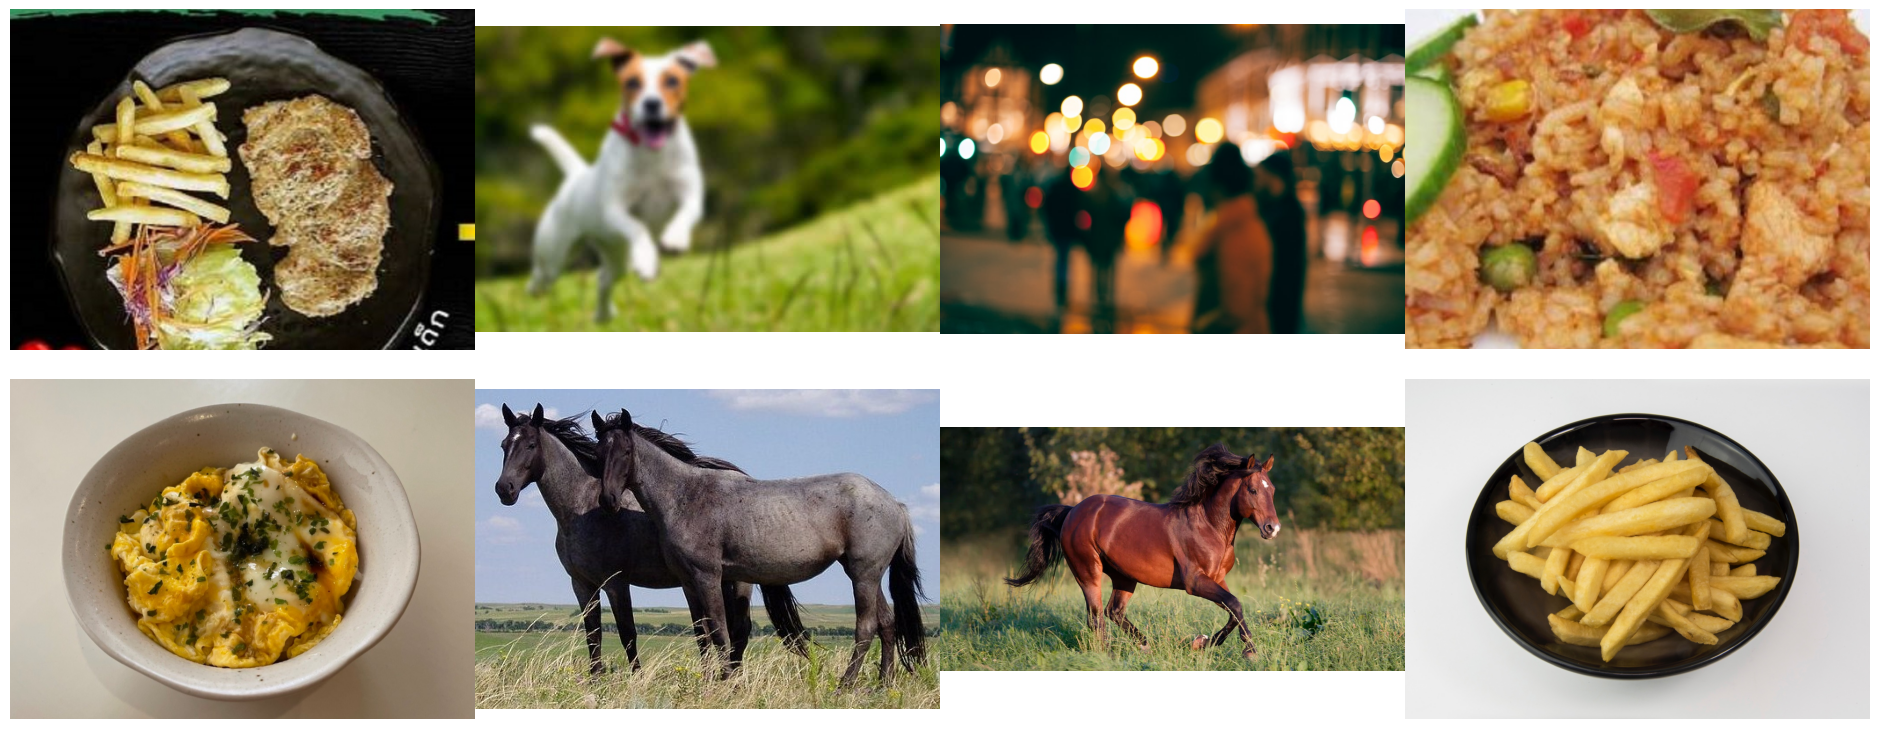

In [22]:
# Set number of rows and columns
nrows = 4
ncols = 4

# Set up matplotlib fig, and size it to fit 2x2 pics
fig = plt.gcf()
fig.set_size_inches(nrows*6, ncols*6)

# Plot sample images
for index, image_path in enumerate(blurry_images + not_blurry_images):

    # Retrieve image and show it
    subplot = plt.subplot(nrows, 
                          ncols, 
                          index + 1)
    subplot.axis('off')
    image = mpimg.imread(image_path)
    plt.imshow(image)
    
plt.subplots_adjust(wspace=0, hspace=-0.5)
plt.show()

# Utils Functions

## Compute Laplacian Variance

In [23]:
def compute_laplacian_variance(image: np.ndarray) -> float:
    """
    Compute the Variance of the Laplacian of the image
    
    Parameters:
        image: numpy.ndarray of the image
        
    Returns:
        laplacian_variance: float of Variance of the Laplacian of the image
    """
    
    # Compute the Variance of the Laplacian
    laplacian_variance = round(cv2.Laplacian(image, cv2.CV_64F).var(), 3)
    
    return laplacian_variance

## Read Image

In [24]:
def read_image_greyscale(image_path: str) -> np.ndarray:
    """
    Read an image from a String path and return the greyscale Numpy array of it
    
    Parameters:
        image_path: String image path
        
    Returns:
        image_greyscale: numpy.ndarray of the greyscale image
    """
    
    # Read the image through OpenCV
    image = cv2.imread(image_path)
    
    # Convert the image to greyscale
    image_greyscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    return image_greyscale

# Compute Variance of the Laplacian

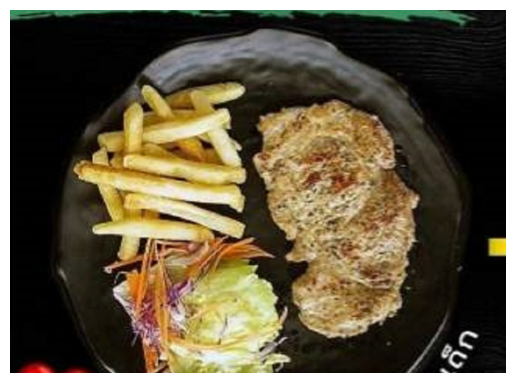

Blurried image 0 has a Variance of the Laplacian equals to: 71.943




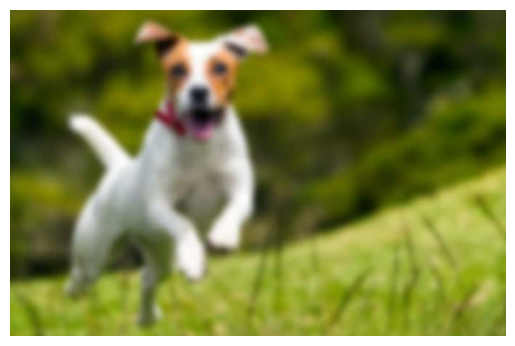

Blurried image 1 has a Variance of the Laplacian equals to: 7.57




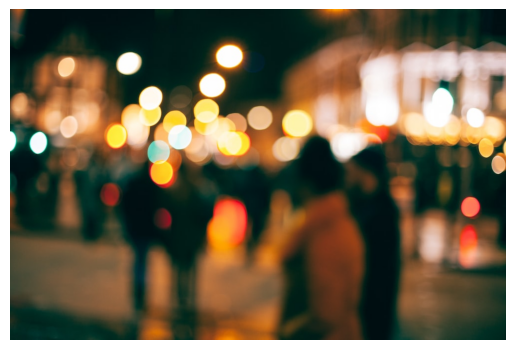

Blurried image 2 has a Variance of the Laplacian equals to: 27.989




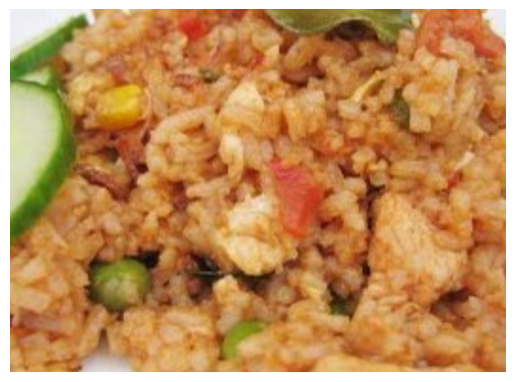

Blurried image 3 has a Variance of the Laplacian equals to: 14.944




In [25]:
# Compute the variance of the Laplacian of the blurried images
for index, image_path in enumerate(blurry_images):
    
    # Read the image
    image_greyscale = read_image_greyscale(image_path)
    
    # Show Image
    image = mpimg.imread(image_path)
    plt.axis('off')
    plt.imshow(image)
    plt.show()
    
    print('Blurried image {} has a Variance of the Laplacian equals to: {}'.format(index, compute_laplacian_variance(image_greyscale)))
    print('\n')

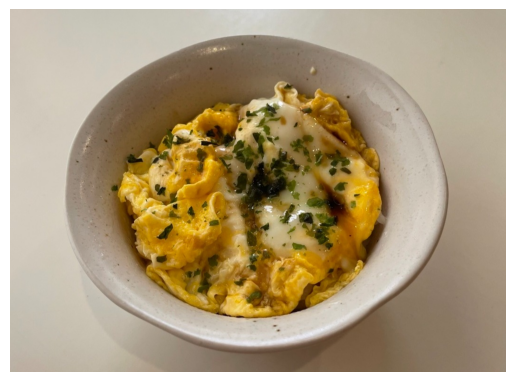

NOT Blurried image 0 has a Variance of the Laplacian equals to: 101.11




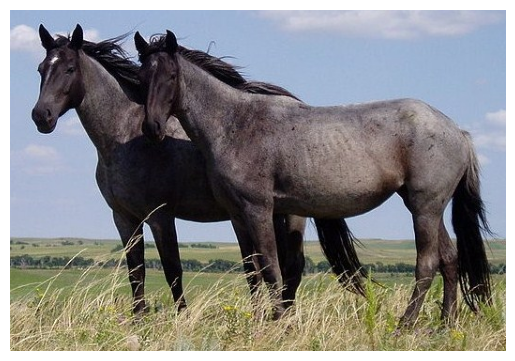

NOT Blurried image 1 has a Variance of the Laplacian equals to: 4432.184




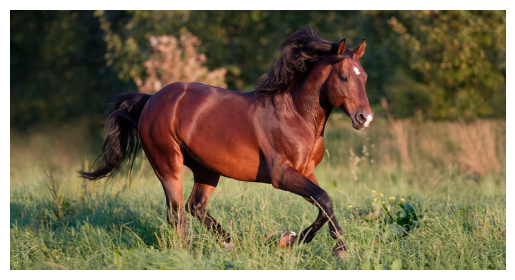

NOT Blurried image 2 has a Variance of the Laplacian equals to: 585.759




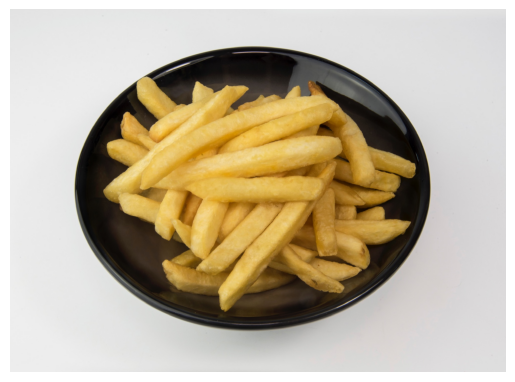

NOT Blurried image 3 has a Variance of the Laplacian equals to: 22.099




In [26]:
# Compute the variance of the Laplacian of the NOT blurried images
for index, image_path in enumerate(not_blurry_images):
    
    # Read the image
    image_greyscale = read_image_greyscale(image_path)
    
    # Show Image
    image = mpimg.imread(image_path)
    plt.axis('off')
    plt.imshow(image)
    plt.show()
    
    print('NOT Blurried image {} has a Variance of the Laplacian equals to: {}'.format(index, compute_laplacian_variance(image_greyscale)))
    print('\n')

The distinction is not relevant unfortunately. It would be hard to come up with a good splitter, especially because some dishes have a low variance only because there are not many "ingredients shown".